# 住宅価格の予測モデル

## データを知る

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()

In [2]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### それぞれのデータの意味
```
- CRIM   : 犯罪発生率(人口単位)    
- ZN     : 25,000フィート以上の住宅区画の割合
- INDUS  : 非小売業の土地面積の割合(人口単位)
- CHAS   : チャールズ川沿いかどうか
- NOX    : 窒素酸化物の濃度
- RM     : 1戸あたりに平均部屋数
- AGE    : 1940年よりも前に建てられた家屋の割合
- DIS    : ボストンの主な5つの雇用圏までの重み付きの距離
- RAD    : 幹線道路へのアクセス指数
- TAX    : 10,000ドルあたりの所得税率
- PTRATIO: 教師1人あたりの生徒の数(人口単位) 
- B      : 1000(Bk - 0.63) ^2 で Bkはアフリカ系アメリカ人居住の割合
- LSTAT  : 低所得者の割合
- MEDV   : 住宅価格の中央値(単位 1,000ドル)
```

### 目的変数の決定
- MEDV(住宅価格の中央値(単位 1,000ドル)) を目的変数とする
- 目的変数はデータを詳しく見ながら検討する

## データセットの特性を可視化する

### 扱いやすくするためにDataFrameを使う


In [3]:
import pandas as pd

df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
df["MEDV"] = boston["target"]

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### ペアプロットを確認する
- 変数どうしの関係性を見る
 

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
cols = ["LSTAT", "INDUS", "NOX", "RM", "MEDV"]

/Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


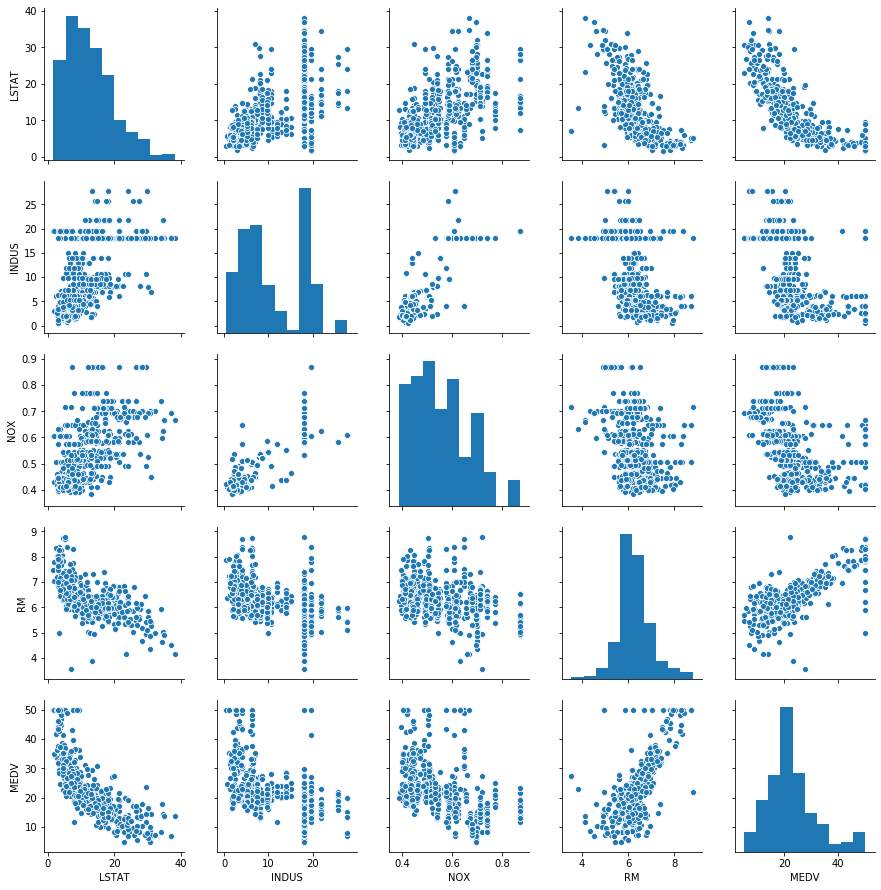

In [7]:
sns.pairplot(df[cols], size=2.5)

### 相関行列で関係を調べる

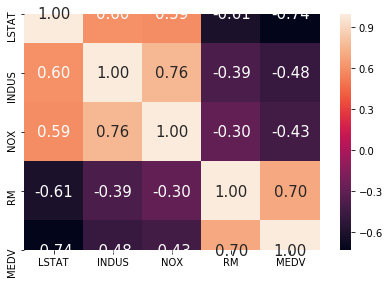

In [8]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)

hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt=".2f",
    annot_kws={"size": 15},
    yticklabels=cols,
    xticklabels=cols
)

plt.tight_layout()

### 説明変数として RM を採択する
- 相関係数が高い(0.70)
- 線形の関係性が見受けられる
- 相関が最も高いLSTAT(0.74)は非線形の関係がありそうなのでここはスルー

## 線形回帰モデル(単回帰分析)

In [9]:
df.iloc[:, -2].values
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [10]:
from sklearn.model_selection import train_test_split

X = df[["RM"]].values
y = df["MEDV"].values

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0
)

In [11]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## モデルの性能評価

### まず、こんな回帰直線が得られた

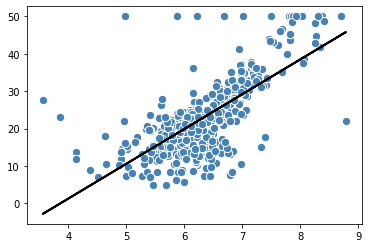

In [12]:
plt.scatter(X, y, c="steelblue", edgecolors="white", s=70)
plt.plot(X, reg.predict(X), color="black", lw=2)
plt.show()

### 残差で評価する

In [13]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

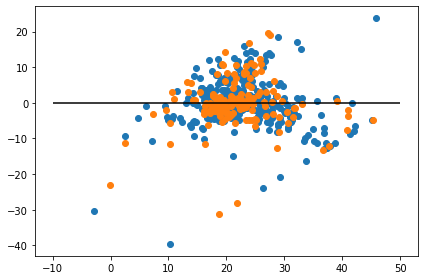

In [14]:
plt.scatter(y_train_pred,  y_train_pred - y_train)

plt.scatter(y_test_pred, y_test_pred - y_test)

plt.hlines(y=0, xmin=-10, xmax=50)

plt.tight_layout()
plt.show()

### MSEで評価

In [15]:
from sklearn.metrics import mean_squared_error

print("Train", mean_squared_error(y_train, y_train_pred))
print("Test", mean_squared_error(y_test, y_test_pred))

Train 42.15765086312224
Test 47.03304747975518


### 決定係数で評価

In [16]:
from sklearn.metrics import r2_score
print("R^2 train", r2_score(y_train, y_train_pred))
print("R^2 test", r2_score(y_test, y_test_pred))

R^2 train 0.5026497630040827
R^2 test 0.43514364832115193


## 重回帰分析でやってみる
- すべての変数を説明変数として採用してみる


In [17]:
X = df.iloc[:, :-1].values
y = df["MEDV"].values

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0
)

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

### 残差

In [19]:
from sklearn.metrics import mean_squared_error

print("Train", mean_squared_error(y_train, y_train_pred))
print("Test", mean_squared_error(y_test, y_test_pred))

Train 19.958219814238042
Test 27.195965766883408


### 決定係数


In [20]:
from sklearn.metrics import r2_score
print("R^2 train", r2_score(y_train, y_train_pred))
print("R^2 test", r2_score(y_test, y_test_pred))

R^2 train 0.7645451026942549
R^2 test 0.6733825506400171
